In [546]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install missingno
!{sys.executable} -m pip install wordcloud

In [547]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, \
            RepeatedStratifiedKFold
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [548]:
from sklearn import tree
from numpy.random import choice as choice
from wordcloud import WordCloud
import re

In [549]:
%matplotlib inline

In [550]:
df = pd.read_csv('train.csv')
to_predict= pd.read_csv('test.csv')

In [551]:
#Regular information
df.shape

(891, 12)

In [552]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [553]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [554]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [555]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [556]:
"""
            Desc
We have: 5 numeric cols(PClass,Age, sibSp, Parch, Fare ), 
#  5 object (Name, Sex,Ticket, Cabin, embarked)


            To DO:

1. See dist of SibSP, PARCH, Fare -- ok
 1.2 Investigate further Age to see if cat or just rounded (Counter) -- ok
2. Change types category = PClass, Sibsp, Parch, Fare and Age maybe -- pending, see coments
                                                                        on EDA
3. See missing details for Age, Cabin and Embarked.. -- ok
  3.1 Creation of full transformation df --ok
4. Impute Embarked (Knn) -- ok
5. Review Name NLP, Cabin  --pending

"""

'\n            Desc\nWe have: 5 numeric cols(PClass,Age, sibSp, Parch, Fare ), \n#  5 object (Name, Sex,Ticket, Cabin, embarked)\n\n\n            To DO:\n\n1. See dist of SibSP, PARCH, Fare -- ok\n 1.2 Investigate further Age to see if cat or just rounded (Counter) -- ok\n2. Change types category = PClass, Sibsp, Parch, Fare and Age maybe -- pending, see coments\n                                                                        on EDA\n3. See missing details for Age, Cabin and Embarked.. -- ok\n  3.1 Creation of full transformation df --ok\n4. Impute Embarked (Knn) -- ok\n5. Review Name NLP, Cabin  --pending\n\n'

Text(0.5, 1.03, 'Correlations btwn vars')

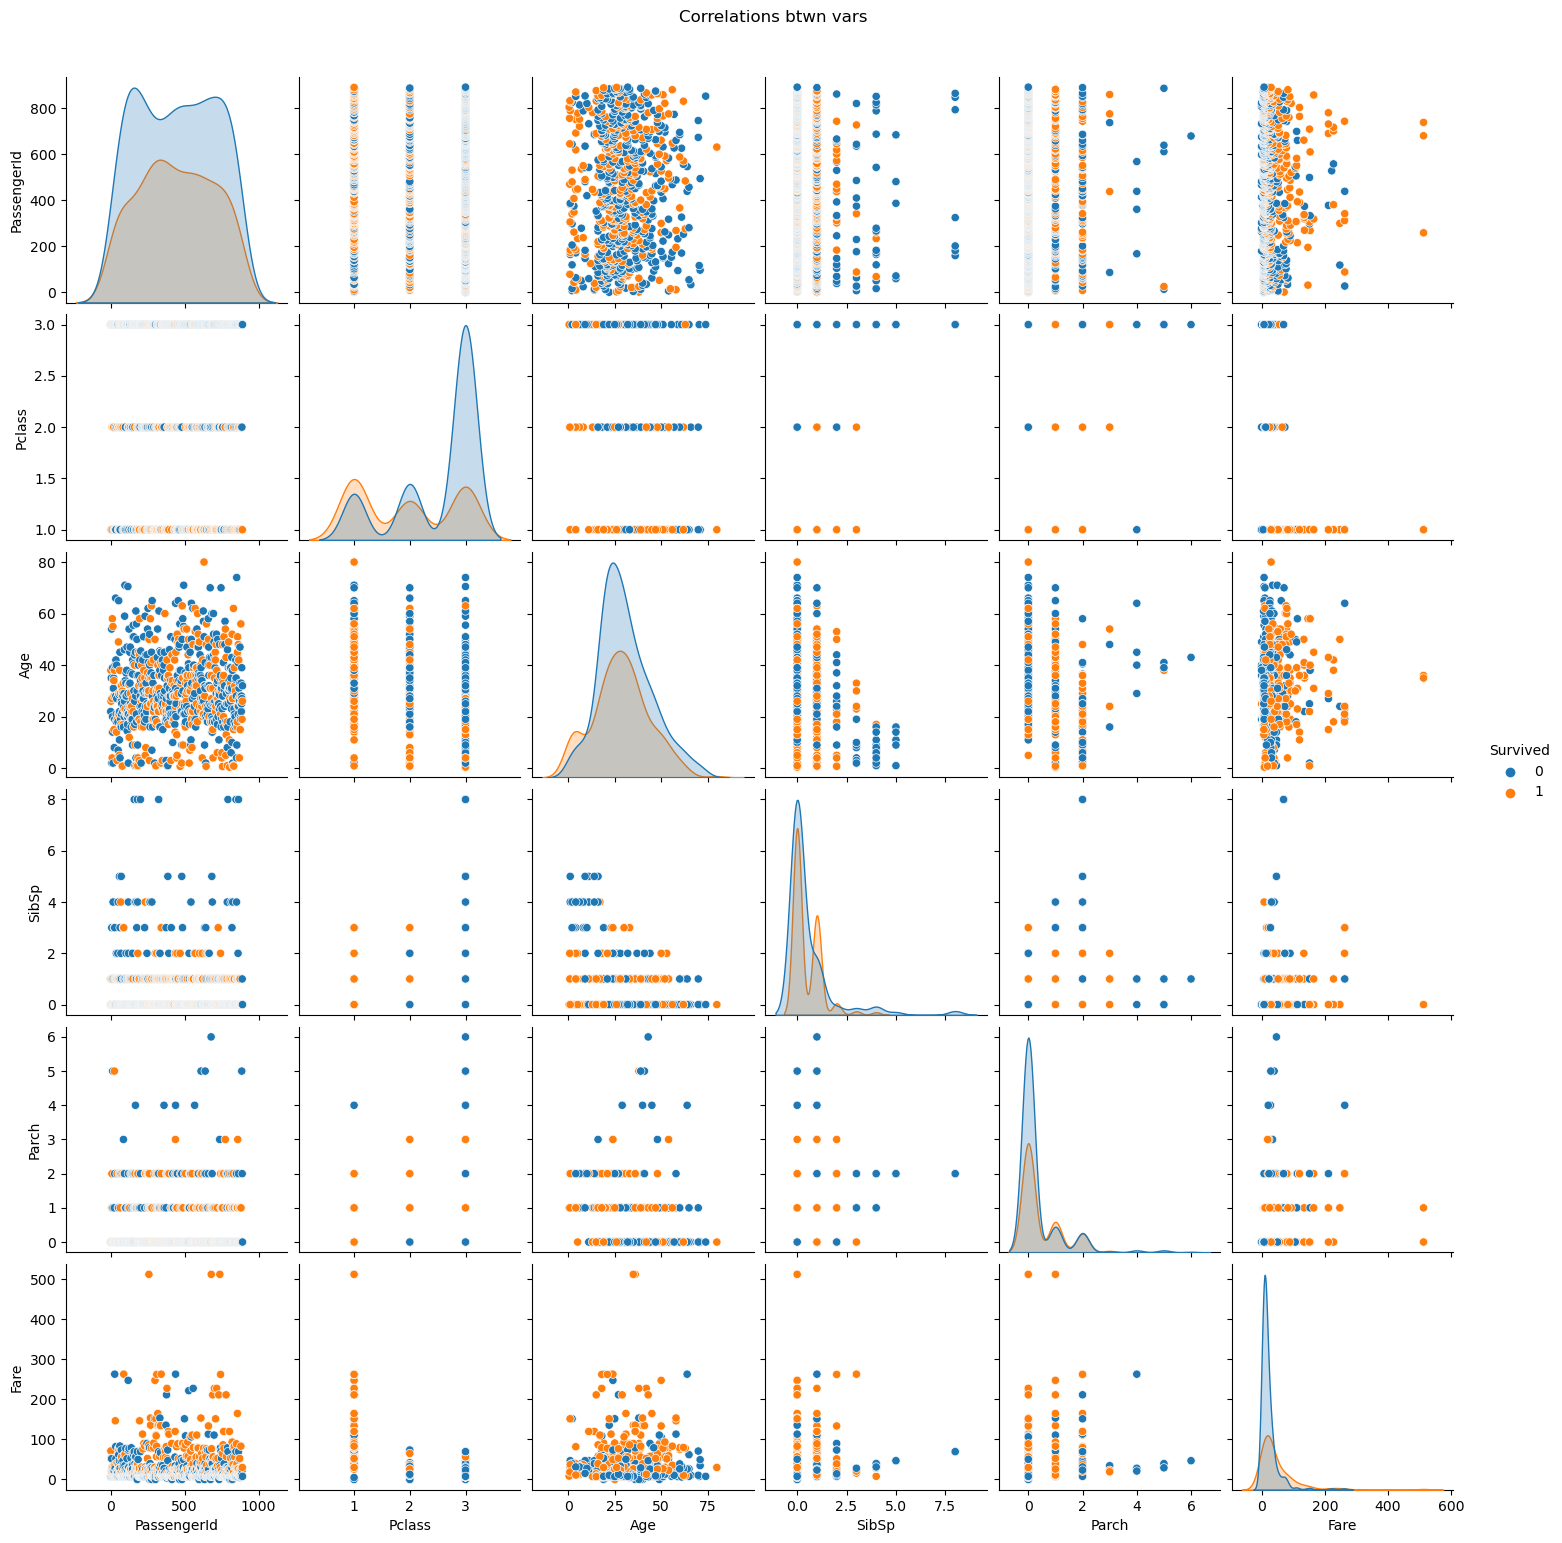

In [557]:
pp= sns.pairplot(df, hue='Survived', )
pp.fig.suptitle('Correlations btwn vars', y=1.03)

In [558]:
"""
            Notes on EDA1
Pclass has some explainability, but they are splitted evenly 
Fare is skewed to the left, I think we can use it with  -- interaction --terms to help the
model
Age must be on categories? 
    at least should be rounded
    Im not sure if categories, let just see it on bins
SibSP i think it can be trimodal to help the survived mode and limit the left skewness
Parch has three frequent modes but the last (2) is very low and the other ones are few cases.  
   recomended to stay on 0,1,2+ cat
   
   
           Further on Age
Counter, 
see hist of counter
"""

'\n            Notes on EDA1\nPclass has some explainability, but they are splitted evenly \nFare is skewed to the left, I think we can use it with  -- interaction --terms to help the\nmodel\nAge must be on categories? \n    at least should be rounded\n    Im not sure if categories, let just see it on bins\nSibSP i think it can be trimodal to help the survived mode and limit the left skewness\nParch has three frequent modes but the last (2) is very low and the other ones are few cases.  \n   recomended to stay on 0,1,2+ cat\n   \n   \n           Further on Age\nCounter, \nsee hist of counter\n'

<AxesSubplot:ylabel='Density'>

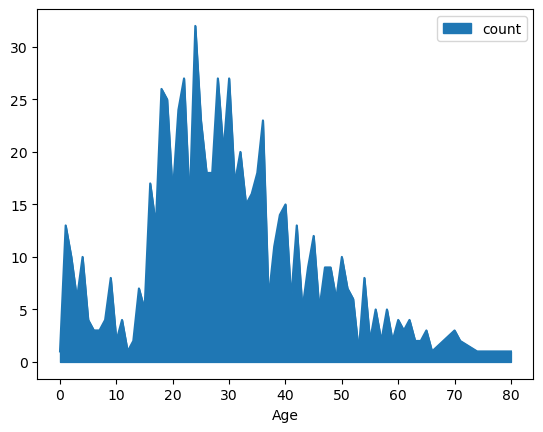

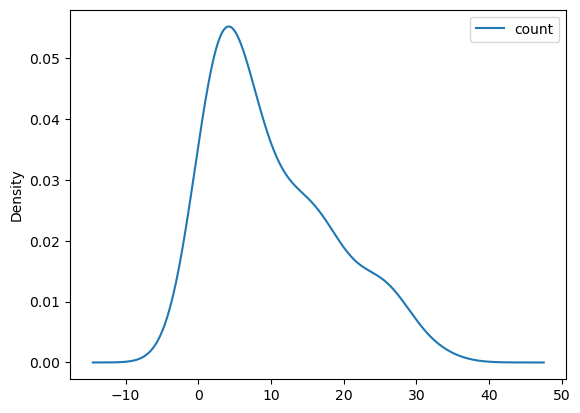

In [559]:
# After trying sns.countplot(df.Age) we dropnas and round only toodlers are affected, 
#and half ages

age_round= df['Age'].round()
age_df= age_round.value_counts(dropna=True).rename_axis('Age').reset_index(name='count')
age_df = age_df.sort_values('Age')
age_df.plot(x='Age', y='count', kind= 'area', rot=0)
age_df.plot(x='Age', y='count', kind= 'kde')

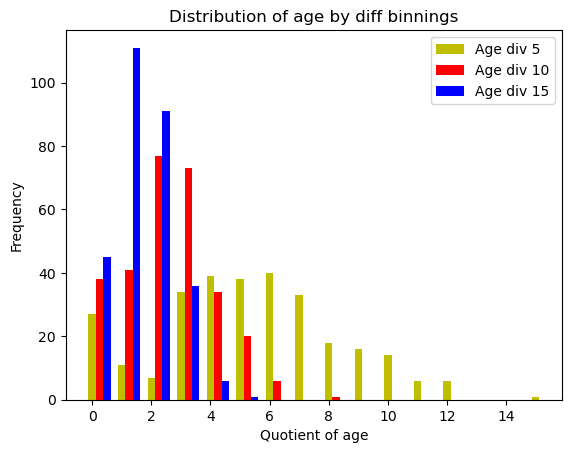

In [560]:
df['Age_by_5'] = df.Age // 5
df['Age_by_10'] = df.Age //10
df['Age_by_15'] = df.Age //15

#[[df.Age//div for row in df] for div in [5,10,15]]
#Maybe the following could been achieved easier w pivot
Pcg_by_5 = df.groupby('Age_by_5')['Survived'].sum().to_frame()
Pcg_by_10 = df.groupby('Age_by_10')['Survived'].sum().to_frame()
Pcg_by_15 = df.groupby('Age_by_15')['Survived'].sum().to_frame()

summary_age = Pcg_by_5.join(Pcg_by_10, lsuffix='_on5', rsuffix='_on10')\
               .join(Pcg_by_15, rsuffix='_on15').reset_index()


barwidth=0.25
fig, ax = plt.subplots()

x1= range(len(summary_age))
x2= [x+ barwidth for x in x1]
x3= [x+ barwidth for x in x2]

ax.bar(x1,summary_age.Survived_on5, label='Age div 5',color='y', width= barwidth)
ax.bar(x2, summary_age.Survived_on10, label='Age div 10', color='r', width= barwidth)
ax.bar(x3, summary_age.Survived, label='Age div 15', color='b', width= barwidth)

plt.xlabel('Quotient of age')
plt.ylabel('Frequency')
plt.title('Distribution of age by diff binnings')

plt.legend(loc= 'upper right')
plt.show()

'\nWe viewed last time that approximately 3 | 4 bins would be accurate, however reviewing \nthe distribution of Age the binning will be:\n\n0-19 years inclusive  - 27.24%\n20-29 years inclusive - 26.55%\n30-39 years inclusive - 25.17%\n40 plus               - 21.04% \n'

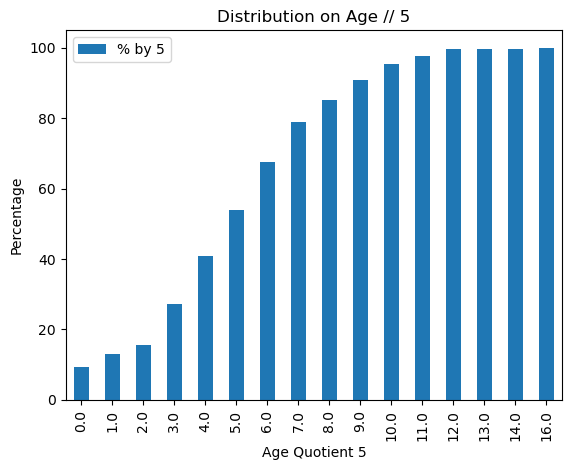

In [561]:
summary_age['Cumsum_5'] = summary_age.Survived_on5.cumsum()
Total_age_ans= summary_age.Survived_on5.sum()
summary_age['% by 5'] = summary_age.Cumsum_5*100/ Total_age_ans
summary_age.plot('Age_by_5', '% by 5', kind='bar', title='Distribution on Age // 5'\
                , xlabel='Age Quotient 5', ylabel='Percentage')

"""
We viewed last time that approximately 3 | 4 bins would be accurate, however reviewing 
the distribution of Age the binning will be:

0-19 years inclusive  - 27.24%
20-29 years inclusive - 26.55%
30-39 years inclusive - 25.17%
40 plus               - 21.04% 
"""

<AxesSubplot:>

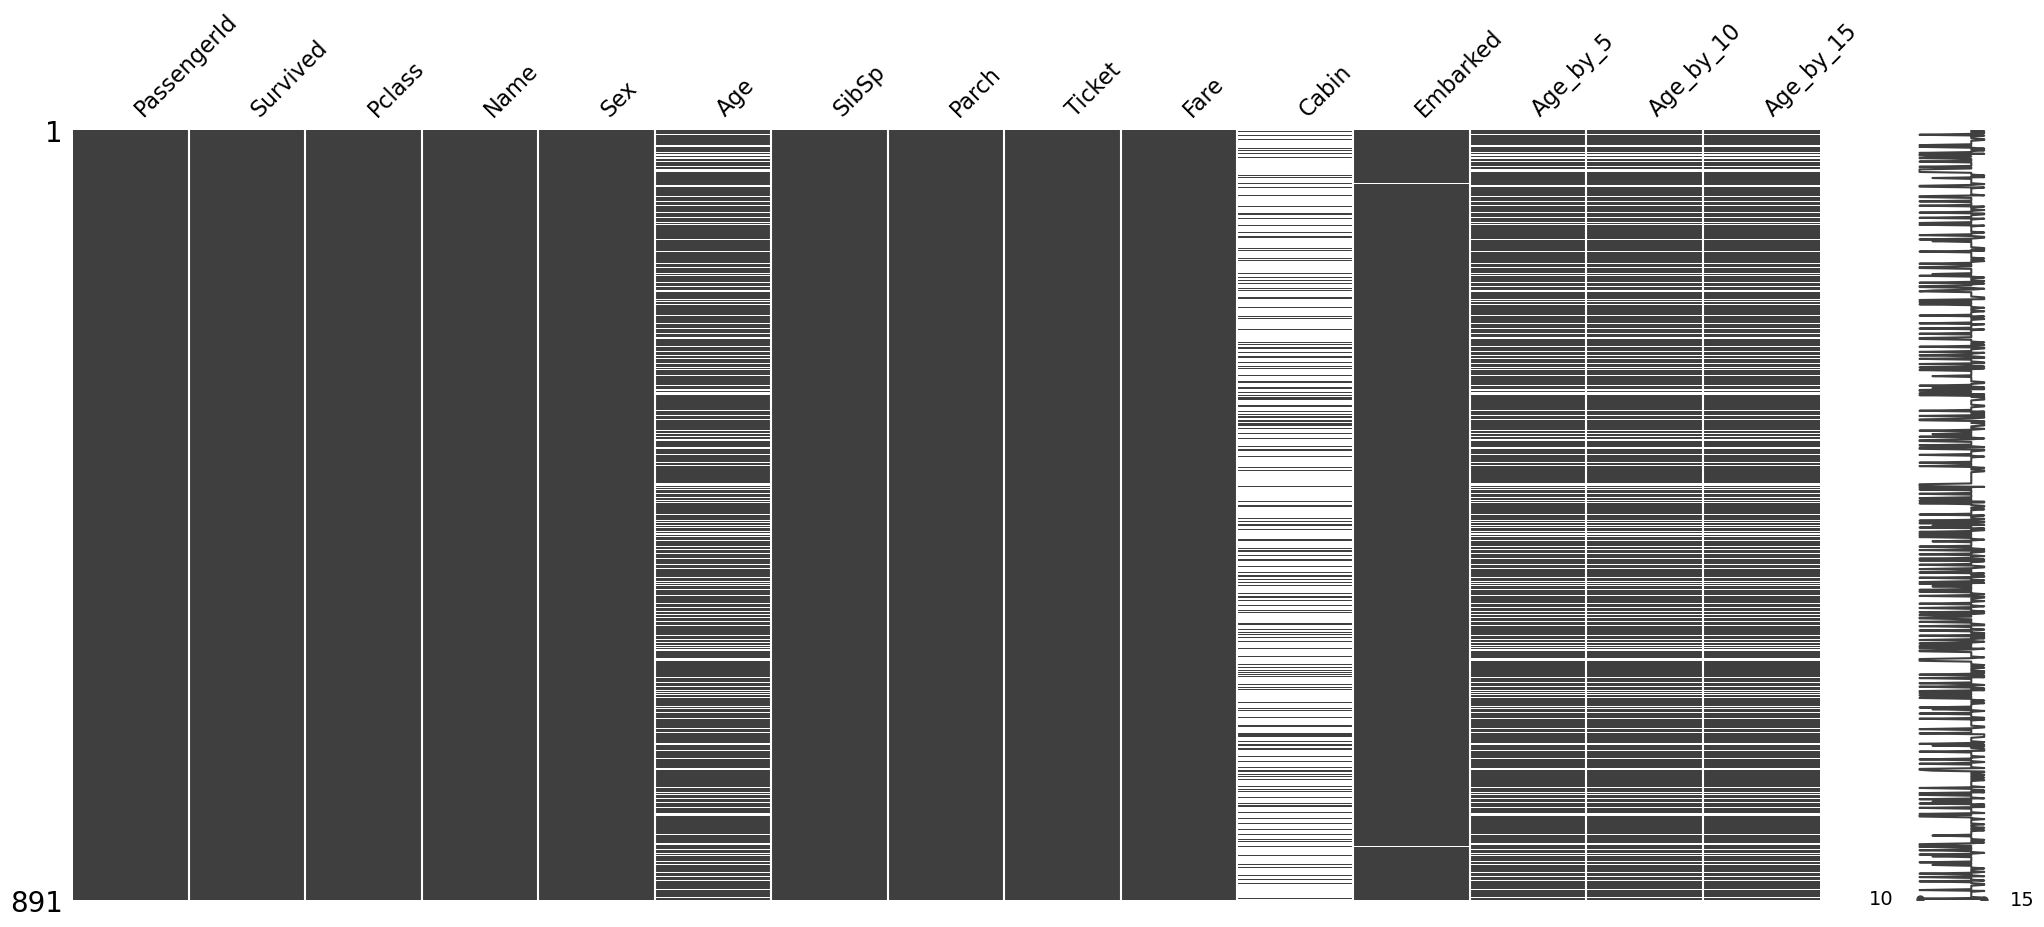

In [562]:
msno.matrix(df)

<AxesSubplot:>

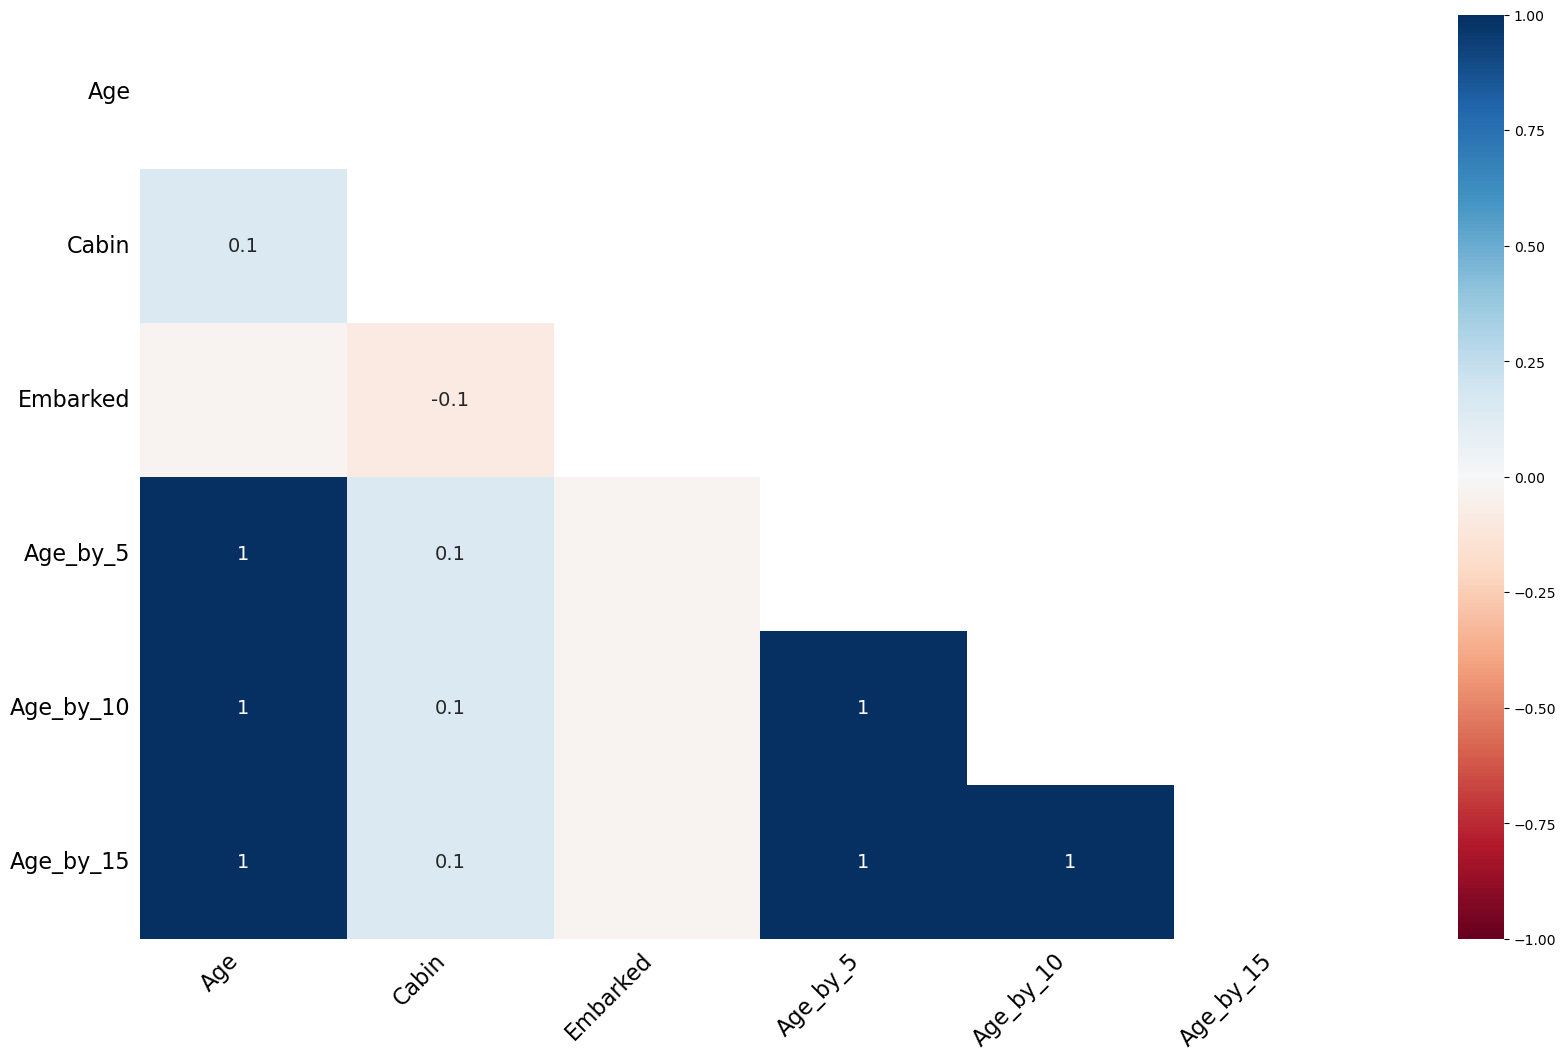

In [563]:
msno.heatmap(df)

<AxesSubplot:>

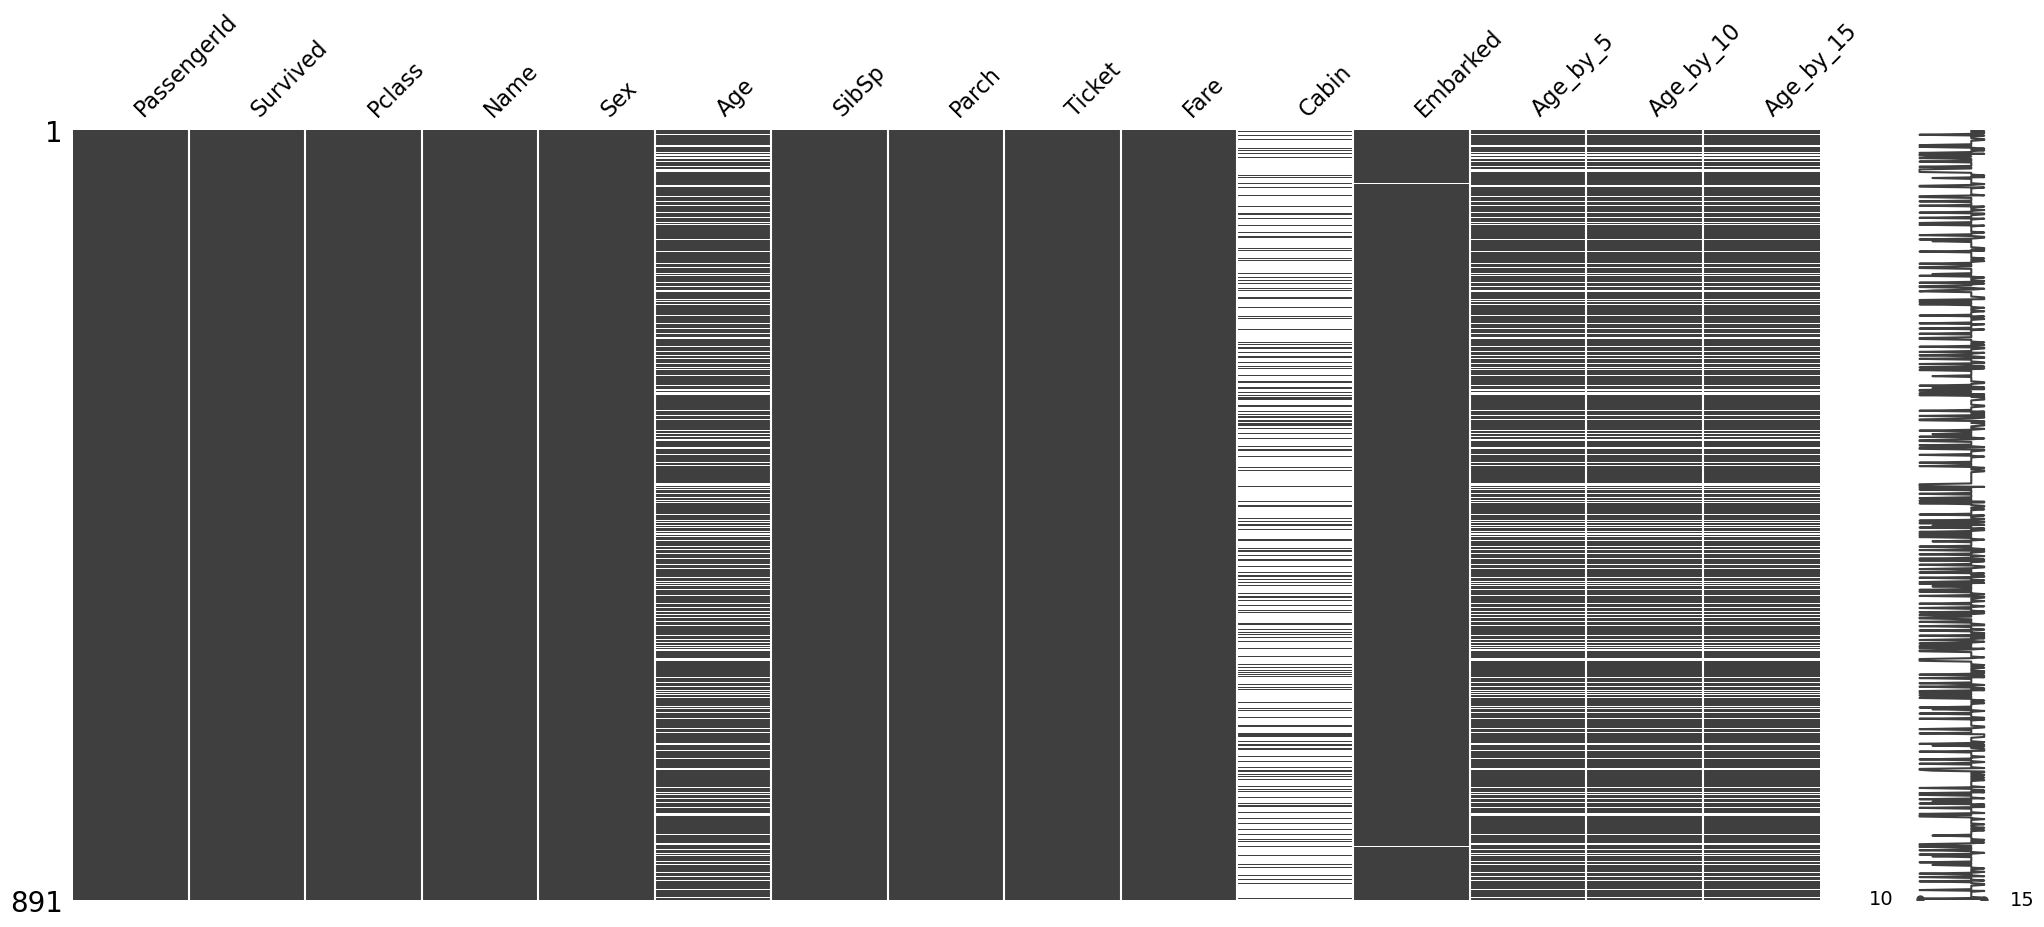

In [564]:
msno.matrix(df)
#There doesnt seem to be any relationship btwn vars towards missingness
#it seems like its completely at random

In [565]:
#Get Only df num cols
col_list_1 = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_imputation= df[col_list_1]
KImp= KNNImputer(n_neighbors=3, add_indicator= True)
age_impu=KImp.fit_transform(df_imputation)

In [566]:
col_list_1.append('Age_imp_indctr')

df_imputation= pd.DataFrame(age_impu, columns=col_list_1)

In [567]:
#Merge with regular df  
df_imputation.shape[0]==df.shape[0]
df_impu= df_imputation[['PassengerId', 'Age', 'Age_imp_indctr']]
d=df.drop('Age', axis=1)
d= d.merge(df_impu,validate ='one_to_one')

df_dict= {'df': 'OG df w changes in Age (rounded)', \
          'to_predict': 'The df that has the test info but not test answer', \
         'df_imputation': 'Has the KNN imputation for Age, all numeric colums of df', \
         'df_impu': 'Has the needed cols to merge to DF', \
         'd':'contains the imputation of age and the rest ' }

In [568]:
#Generate a quick imputation of the missing col 
#and get the categories for the other variables
d.columns

#get index of missing in Embarked, remove from testing
Eimpu_df= d[~d.Embarked.isnull()]
d.Embarked.value_counts()
yEimp = Eimpu_df.Embarked

to_drop=['Embarked', 'PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Age_by_5', \
         'Age_by_10', 'Age_by_15']

Eimpu_df2= Eimpu_df.drop(to_drop,axis=1)

#train logistic model 
X_EimpTr, X_EimpTe, y_EimpTr, y_EimpTe = train_test_split(Eimpu_df2, yEimp, test_size=0.2,\
                                                          stratify=yEimp, \
                                                          random_state=12)

logi_Imp = LogisticRegression(multi_class= 'multinomial', solver='lbfgs',max_iter=1000000)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
logi_Imp.fit(X_EimpTr, y_EimpTr)

#see how much accuracy expect 
n_scores = cross_val_score(logi_Imp, X_EimpTr, y_EimpTr, scoring='accuracy', cv=cv, \
                           n_jobs=-1)
# report the model performance
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))


#predict values, join Dataset
DImp_preds= d[d.Embarked.isnull()].drop(to_drop, axis=1)
Imp_preds=logi_Imp.predict(DImp_preds)
Imp_preds


Mean Accuracy: 0.737 (0.027)


array(['S', 'S'], dtype=object)

In [569]:
#dp= d.loc[d[d.Embarked.isnull()], 'Embarked']= 'S'
d.loc[d['Embarked'].isnull(), 'Embarked'] = 'S'
d.isnull().sum()

d

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_5,Age_by_10,Age_by_15,Age,Age_imp_indctr
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,4.0,2.0,1.0,22.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,7.0,3.0,2.0,38.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,2.0,1.0,26.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,7.0,3.0,2.0,35.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,7.0,3.0,2.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,5.0,2.0,1.0,27.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,3.0,1.0,1.0,19.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN,NaN,28.0,1.0
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,5.0,2.0,1.0,26.0,0.0


'\nFare segmentation after reviewing distribution\n\n0-7 inclusive, 86\n8 206\n9-19,209\n20-40, 188\n>20, 155\n'

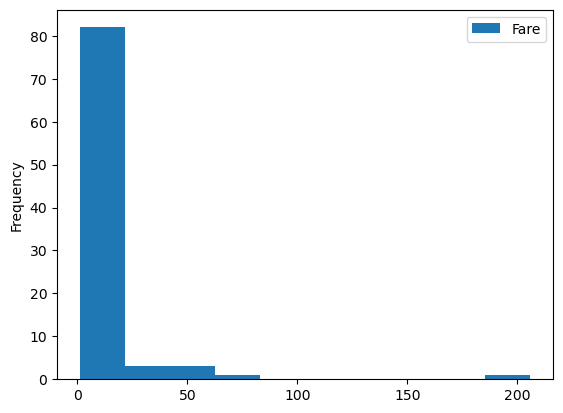

In [570]:
#add categories to rest of variables
Fare_ = d.Fare.round()
Fare_df = Fare_.value_counts().to_frame().sort_index()
Fare_df.reset_index(inplace= True)
Fare_df.plot(x='index', y='Fare', kind='hist')

'''
Fare segmentation after reviewing distribution

0-7 inclusive, 86
8 206
9-19,209
20-40, 188
>20, 155
'''

In [571]:
Fare_df.loc[(Fare_df['index']>50) & (Fare_df['index']<1000), 'Fare'].sum()

def Cattf(column, bins):
    d['column']=pd.cut(d['column'], bins=bins)
pass

d['AgeC']= pd.cut(d.Age, bins=[-1, 19, 29, 39, 100])
d['SibSpC'] = pd.cut(d.SibSp, bins=[-1, 1,50])
d['ParchC']= pd.cut(d.Parch, bins=[-1,1,50])
d['FareC'] = pd.cut(d.Fare, bins=[0,8,19, 40, 600])

list_to_drop = ['Age', 'SibSp', 'Parch', 'Fare', 'Age_by_5', 'Age_by_10', 'Age_by_15']

In [572]:
d.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_by_5,Age_by_10,Age_by_15,Age,Age_imp_indctr,AgeC,SibSpC,ParchC,FareC
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,4.0,2.0,1.0,22.0,0.0,"(19, 29]","(-1, 1]","(-1, 1]","(0, 8]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,7.0,3.0,2.0,38.0,0.0,"(29, 39]","(-1, 1]","(-1, 1]","(40, 600]"
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,5.0,2.0,1.0,26.0,0.0,"(19, 29]","(-1, 1]","(-1, 1]","(0, 8]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,7.0,3.0,2.0,35.0,0.0,"(29, 39]","(-1, 1]","(-1, 1]","(40, 600]"
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,7.0,3.0,2.0,35.0,0.0,"(29, 39]","(-1, 1]","(-1, 1]","(8, 19]"


In [573]:
#Will use Random Forest to create a base model as it doesnt require scaling
l_base_drop = list_to_drop.copy()
#Removed further NLP variables
l_base_drop.extend(['Name', 'Ticket', 'Cabin'])
#Create dummies
dum_list =['Sex', 'Embarked', 'AgeC', 'SibSpC', 'ParchC', 'FareC']

DF_du= pd.get_dummies(d[dum_list])
DF_du

df_dict['DF_du'] = 'DF that contains the dummies of the og not NLP variables'

#Add the dummies for deletion
l_base_drop.extend(dum_list)

Text(0.5, 0, 'Random Forest Feature Importance')

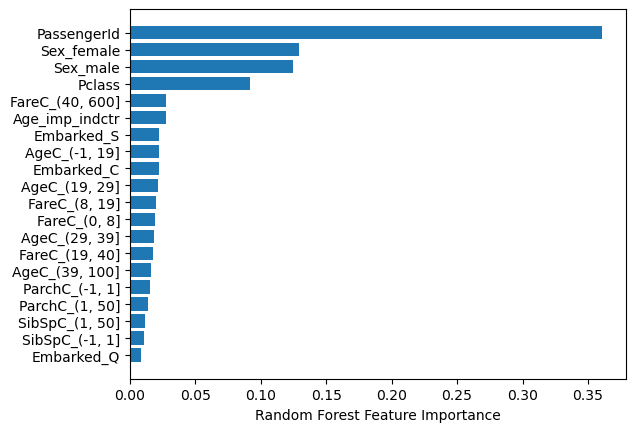

In [574]:
d1 = d.drop(columns = l_base_drop)
d1 = d1.merge(DF_du,left_index=True, right_index= True, validate='one_to_one' )
df_dict['d1']= 'DF to create RF basemodel, removed NLP cols, added dummies'

d1_x = d1.loc[:, d1.columns != 'Survived']
d1_y = d1.Survived

seed1= 71


X_RFTr, X_RFTe, y_RFTr, y_RFTe = train_test_split(d1_x, d1_y, test_size=0.2,\
                                                          stratify=d1_y, \
                                                          random_state=seed1)

RF_1 = RandomForestClassifier(n_estimators = 150, random_state= seed1)

RF_1.fit(X_RFTr, y_RFTr)
#RF_1.predict_proba(X_RFTe)

CV_RF1 = cross_val_score(RF_1, X_RFTr, y_RFTr, scoring='f1', cv=6)


#RFE
sorted_idx = RF_1.feature_importances_.argsort()
plt.barh(RF_1.feature_names_in_[sorted_idx], RF_1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


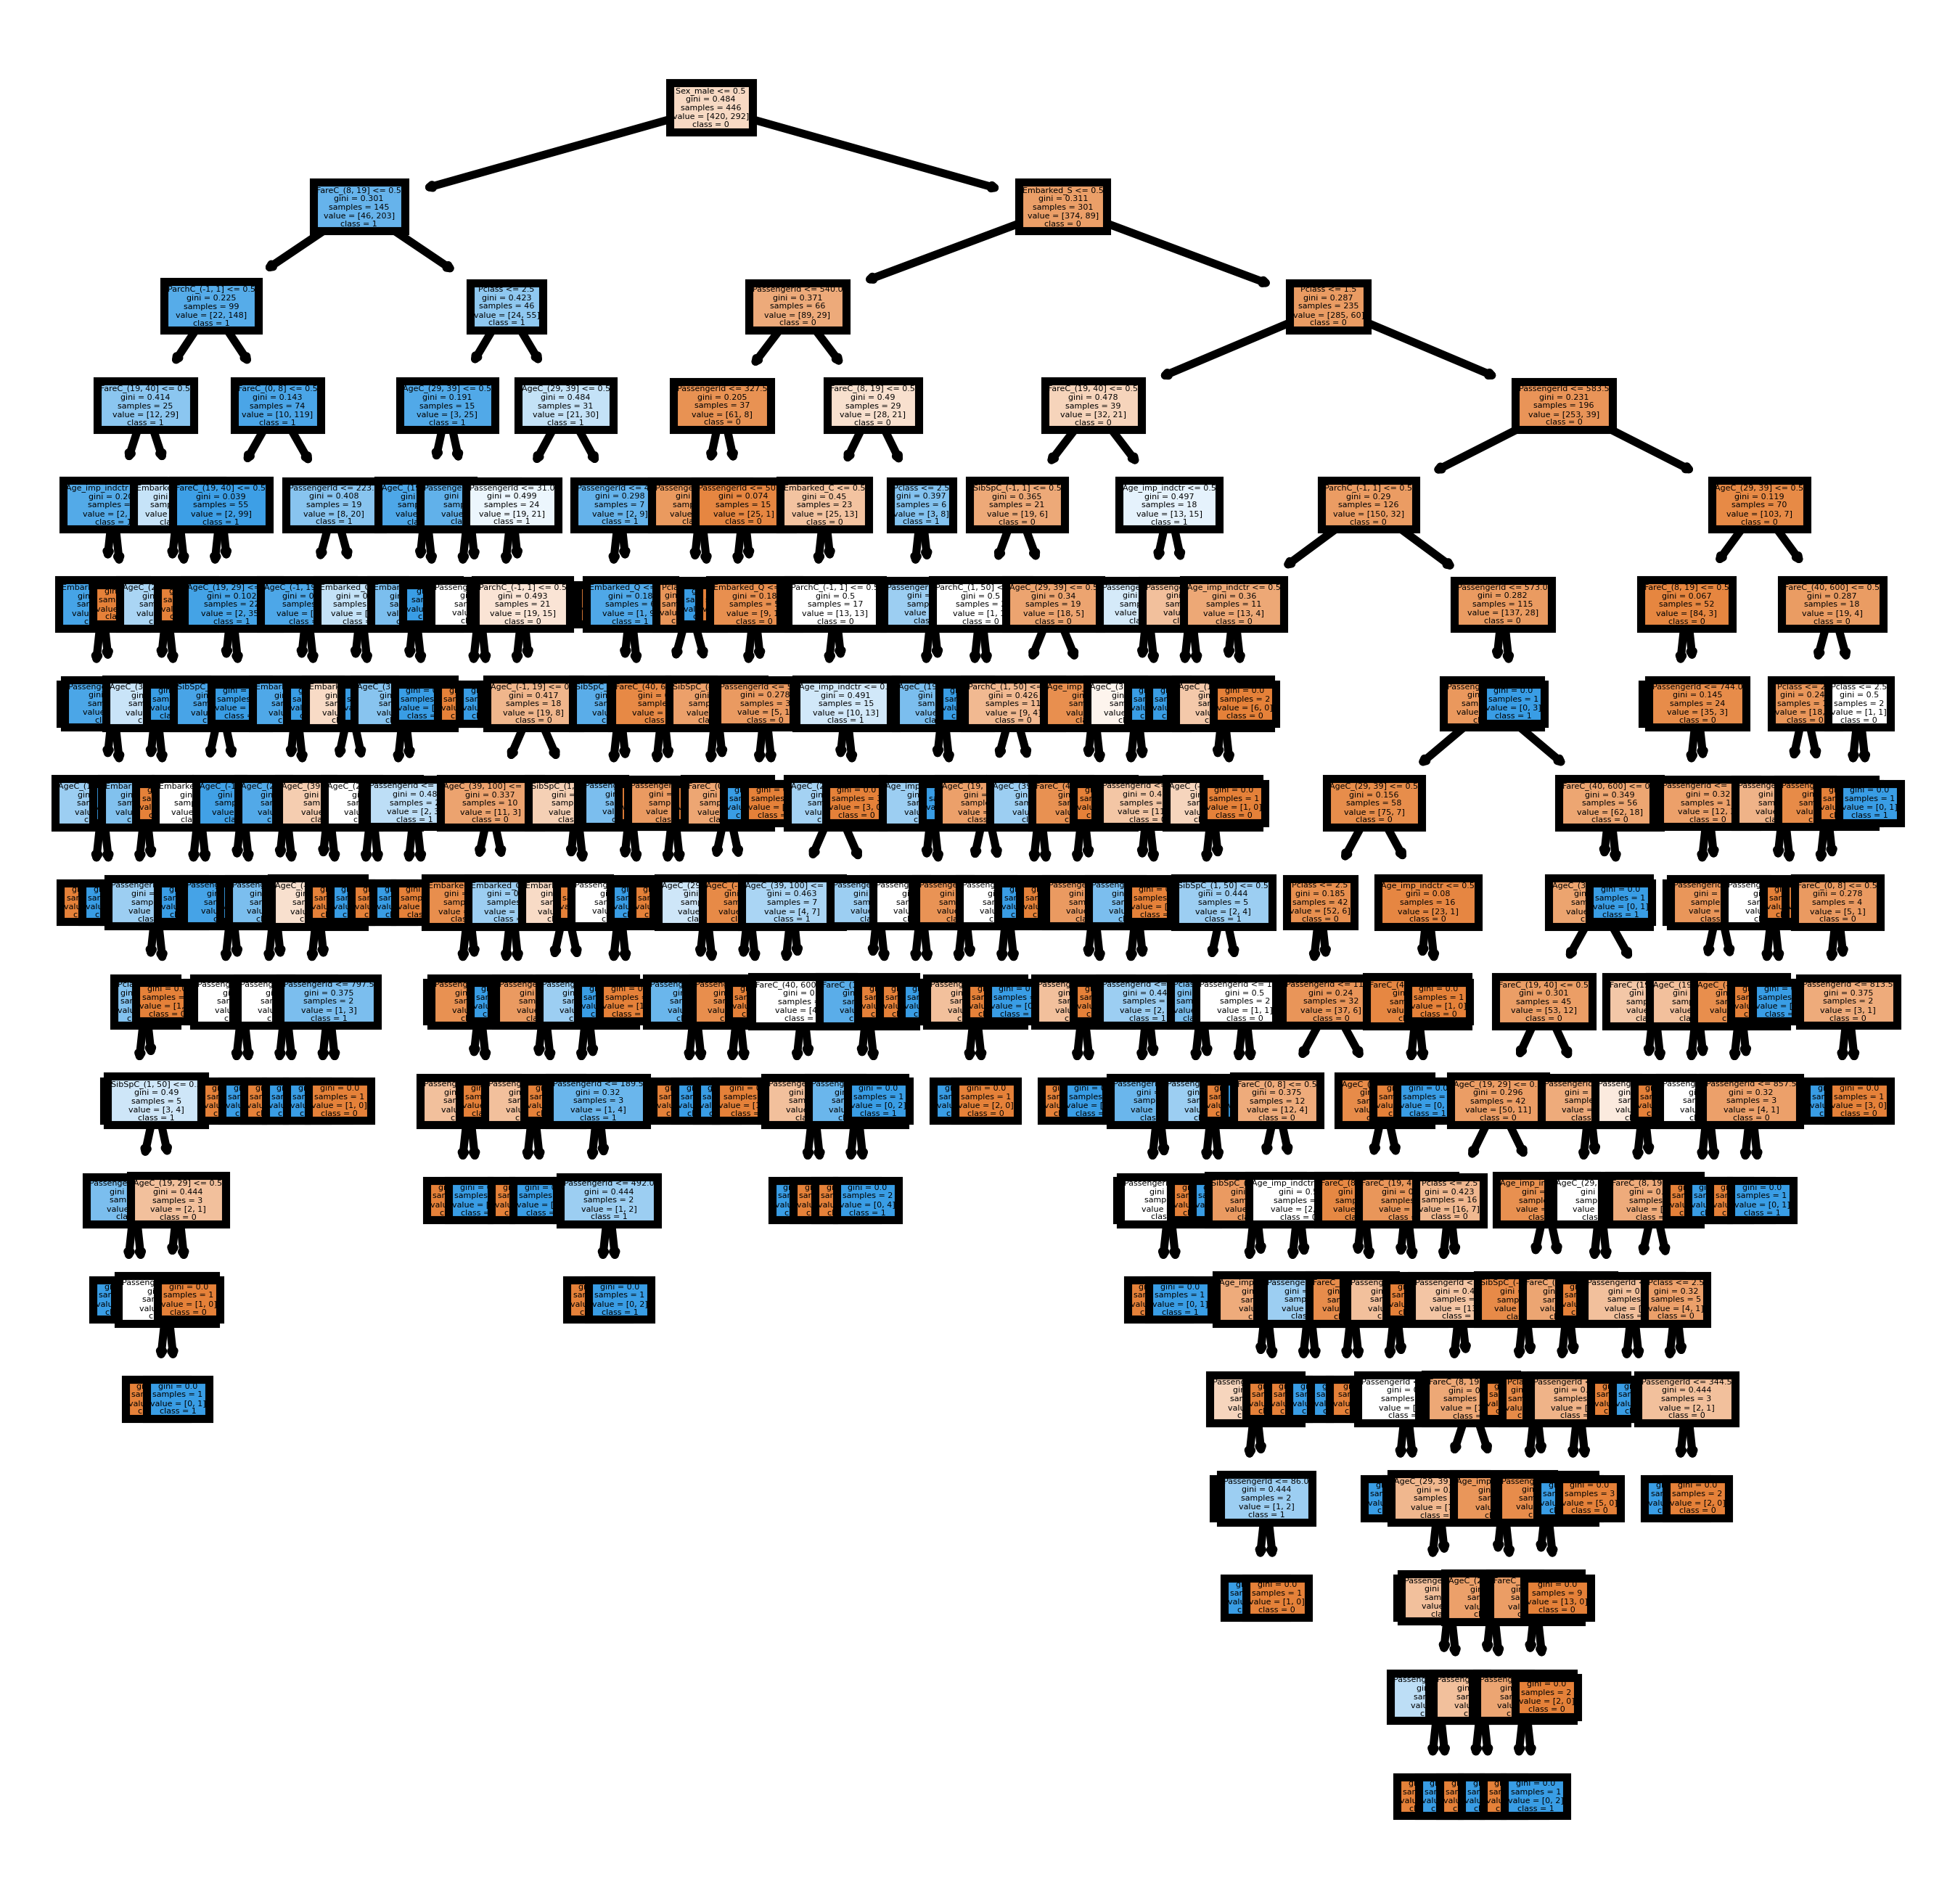

In [575]:
#Seeing trees 
randy = choice(range(1,150), 3, replace=False) 

fig2, axes2= plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
for i in randy:
    estimator= RF_1.estimators_[i]
    tree.plot_tree(estimator,
               feature_names = d1_x.columns, 
               class_names=d1_y.astype('str'),
               filled = True);
    fig2.savefig('rf_tree'+str(i)+'.png')
    

In [576]:
#Get the regular metrics on model
rf1_score = RF_1.score(X_RFTe, y_RFTe)
rf1_score
print(str(CV_RF1.mean()) +' '+ str(rf1_score))
#Without HP tuning we got an 82% score on data. that would be our base
#Eventhought its curious that passengerID is marked as a great estimator. 
#We will get another look into this using regularization on Logistic Regression
#Also the CV result is around 74% so this is our baseline

0.6434820227308669 0.8156424581005587


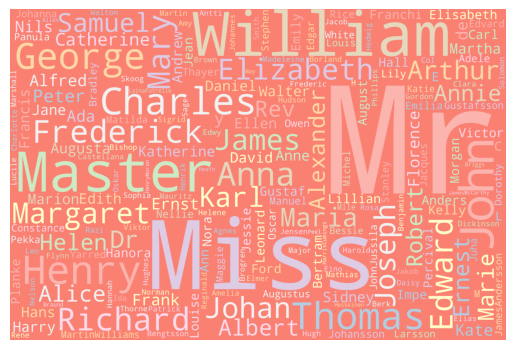

In [577]:
Names_concat = "".join(name for name in d.Name)
tick_cat = "".join(ticket for ticket in d.Ticket)
cabin_cat = "".join(cab for cab in d.Cabin.replace(np.NaN, ""))

wordcloud = WordCloud(
                    width=3000,
                    height=2000,
                    random_state=1,
                    background_color="salmon",
                    colormap="Pastel1",
                    collocations=False,
        ).generate(Names_concat)

  # Display the generated Word Cloud
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


#For the Names we can check if MASTER, MR, Miss has some effect
list_names_cond =['MASTER', 'MR', 'Miss']
#For the Ticket we can try C O P PP, PARIS, W, AH,Q 0Q 02 (old approach, didnt get the words)
#list_ticket_cond_old = ['PP', 'PARIS', 'W', 'AH', 'Q', '02']
#Only words here we can try SOTON, PC, C, STON, PARIS, CA, SC
list_ticket_cond = ['SOTON', 'PC', 'C', 'STON', 'PARIS', 'CA','SC']
#For Cabin we can Try B63, B59, C25, B53
list_cabin_cond = ['B63', 'B59', 'C25', 'B53']

In [578]:
#Want to create new cols but how to do it reproducible
#maybe create a function that creates extra columns for each list? 
#review code that is fast

def cond_cols(dataframe, col_condition, list_contains):
    for each in list_contains:
        dataframe[col_condition+'_'+each] = np.where(dataframe[col_condition].str.\
                                                     contains(each),1,0)
    pass


In [579]:
#For improving the analysis on the ticket
Regex_ti = d.Ticket.apply(lambda row: re.sub('[0-9]', '', row))
Regex_ti

regex_ti_concat = "".join(letters for letters in Regex_ti)

In [580]:
#Creating DF for NLPs 
Nlp_vars = ['PassengerId','Name', 'Ticket', 'Cabin']
Nlp_df = d.loc[:, Nlp_vars]
df_dict['Nlp_df']= 'Df with NLP OG vars and transformed'



cond_cols(Nlp_df, 'Name', list_names_cond)
cond_cols(Nlp_df, 'Ticket', list_ticket_cond)
cond_cols(Nlp_df, 'Cabin', list_cabin_cond)

Nlp_df.head()

,PassengerId,Name,Ticket,Cabin,Name_MASTER,Name_MR,Name_Miss,Ticket_SOTON,Ticket_PC,Ticket_C,Ticket_STON,Ticket_PARIS,Ticket_CA,Ticket_SC,Cabin_B63,Cabin_B59,Cabin_C25,Cabin_B53
0,1,"Braund, Mr. Owen Harris",A/5 21171,NaN,0,0,0,0,0,0,0,0,0,0,1,1,1,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,0,0,1,0,0,0,1,0,0,0,1,1,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,"Allen, Mr. William Henry",373450,NaN,0,0,0,0,0,0,0,0,0,0,1,1,1,1


In [581]:
#Have to merge only the transformedNLP cols on d1 Dataframe the 1 w dummies 

list_nlp_remove = Nlp_vars.copy()
list_nlp_remove.remove('PassengerId')
NLP_T_DF = Nlp_df.loc[:, Nlp_df.columns.difference(list_nlp_remove)]
NLP_T_DF

F_DF= NLP_T_DF.merge(d1_x, on='PassengerId', validate='one_to_one')
df_dict['F_DF']= 'Final DF with all features converted according to our analysis'

In [582]:
#Scalars = PassengerId (forced to be btwn 0,1 (minMax)), PClass (dummy variable)

F_DF.Pclass= F_DF.Pclass.astype('str')
list_Class_cond = ['2','3']
cond_cols(F_DF, 'Pclass', list_Class_cond)

F_DF['S_PassengerId']= (F_DF.PassengerId.values-F_DF.PassengerId.min())/ \
            (F_DF.PassengerId.max()-F_DF.PassengerId.min())

list_Final_Cols_rem =['Pclass', 'PassengerId']
F_DF= F_DF.drop(columns= list_Final_Cols_rem)

In [583]:
# best option to try a model and get the results, plot them? 
#try kmeans, logistic, RF again,

#to compare apples-apples let have the same index as we separated in the first RF model
index_X= X_RFTr.index

X_Train, y_Train, X_Test, y_test= F_DF.loc[index_X, :], d1_y.loc[index_X], \
                                F_DF.loc[F_DF.index.difference(index_X),:], \
                                d1_y.loc[index_X.difference(index_X)]

#NOTE: return to create the CV object to compare, then use a dictionary to create the 
#function. Then create the dbase, investigate which metrics can be introduced. 


dict_func= {'KMeans': KMeans(n_clusters=2), 'LogisticRegression': LogisticRegression(),\
            'RandomForestClassifier': RandomForestClassifier()}

DF_Comp = pd.DataFrame(columns=['model', 'F1_cv'])

for key in dict_func:
    algo= dict_func[key]
    model = algo.fit(X_Train, y_Train)
    ypred= model.predict(X_Test)
    
    CVs= cross_val_score(model, X_Train, y_Train, cv=6, scoring='f1_macro')
    row= {'model': key, 'F1_cv': CVs.mean()}
    DF_row= pd.DataFrame([row])
    DF_Comp = pd.concat([DF_row, DF_Comp], ignore_index=True)

In [584]:
DF_Comp

,model,F1_cv
0,RandomForestClassifier,0.753135
1,LogisticRegression,0.774961
2,KMeans,0.385195


In [585]:
#Try logistic regression hp

#Usually we shouldnt try to get HP to avoid Overfitting but...
LR= LogisticRegression(solver='saga')


#to get the number of iters if we assume we have 2% of finding optimal parameters for each
#sample of combination of hp (n) then we have a probability of getting nothing:
#p_=1-0.02 
#for each of our samples will be p_**n
#So the probability of not finding the sample will be:
#1-(p)**n
#So it will be 150 samples that will be made

dict_HP={'penalty':['l2', 'l1', 'elasticnet'],
        'C':np.linspace(0.001, 2, 150), 
        'max_iter': np.linspace(100, 1000, 10)}


rando= RandomizedSearchCV(estimator= LR, n_iter= 150, param_distributions=dict_HP, 
                   scoring='f1_macro', n_jobs=4, cv=10)

rando.fit(X_Train, y_Train)
rando.best_params_
rando.best_score_

/Users/erickmunoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/erickmunoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/erickmunoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/erickmunoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/erickmunoz/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/erickmunoz/opt/ana

0.7791564923538383

<AxesSubplot:xlabel='Var'>

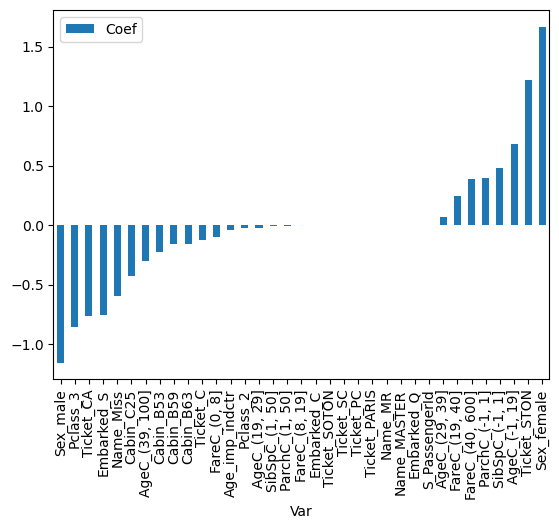

In [586]:
#See the best variables

LRF = LogisticRegression(solver='saga', penalty='l1', max_iter=1000, C=1.3694429530201342)
LRF.fit(X_Train, y_Train)
zipper =zip(X_Train.columns, LRF.coef_[0])

DF_FI= pd.DataFrame(zipper, columns=['Var', 'Coef'])
DF_FI.sort_values(by='Coef', inplace=True)
DF_FI.plot(x='Var', y='Coef', kind='bar')

In [587]:
#make the transformations necessary for predicting the test set
to_predict.isnull().sum()

#solve missingness in Fare (AVG imputation), Age (model), Cabin  just replace np.Nan with ''
to_predict.loc[to_predict['Fare'].isnull(), 'Fare']=to_predict.Fare.mean()

#age
to_predict['Age']= to_predict.Age.round()
col_list_2 = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df_impu_pred= to_predict[col_list_2]
age_impu_pred=KImp.fit_transform(df_impu_pred)
col_list_2.append('Age_imp_indctr')


df_impu_pred= pd.DataFrame(age_impu_pred, columns=col_list_2)
df_impu_pred= df_impu_pred[['PassengerId', 'Age', 'Age_imp_indctr']]
to_predict=to_predict.drop('Age', axis=1)
to_predict= to_predict.merge(df_impu_pred,validate ='one_to_one')

#Fare
to_predict['Fare']= to_predict.Fare.round()


#binning
to_predict['AgeC']= pd.cut(to_predict.Age, bins=[-1, 19, 29, 39, 100])
to_predict['SibSpC'] = pd.cut(to_predict.SibSp, bins=[-1, 1,50])
to_predict['ParchC']= pd.cut(to_predict.Parch, bins=[-1,1,50])
to_predict['FareC'] = pd.cut(to_predict.Fare, bins=[0,8,19, 40, 600])


#dummies
#list_drop=['Age', 'SibSp', 'Parch', 'Fare']
P_du= pd.get_dummies(to_predict[dum_list])


#NLP
Nlp_df_pred = to_predict.loc[:, Nlp_vars]

cond_cols(Nlp_df_pred, 'Name', list_names_cond)
cond_cols(Nlp_df_pred, 'Ticket', list_ticket_cond)
cond_cols(Nlp_df_pred, 'Cabin', list_cabin_cond)


P= Nlp_df_pred.merge(P_du, right_index=True, left_index=True, validate='one_to_one')


In [588]:
#falta Class, Age_imp_indctr
to_predict['Pclass']= to_predict.Pclass.astype('str')
list_Class_cond = ['2','3']
cond_cols(to_predict, 'Pclass', list_Class_cond)

P_Class=to_predict[['Pclass_2', 'Pclass_3']]

P['S_PassengerId']= (P.PassengerId.values-P.PassengerId.min())/ \
            (P.PassengerId.max()-P.PassengerId.min())
P_Pid= P.PassengerId
P_AII= to_predict.Age_imp_indctr


P= P.merge(P_Class, right_index=True, left_index=True).merge(P_AII, right_index= True,\
                                                            left_index= True, validate='one_to_one')

list_Final_Cols_remP =['PassengerId', 'Name', 'Ticket', 'Cabin']
P= P.drop(columns= list_Final_Cols_remP)



In [589]:
list_col_names= X_Train.columns.values.tolist()

P= P[list_col_names]

In [590]:
#Review test data is it Overfit? put this step in the study tab
#Convert test data it should only have a PassengerId and binary variable Survived

In [591]:
preds=LRF.predict(P)

In [592]:
preds=pd.DataFrame(preds, columns=['Survived']).merge(P_Pid, \
                  right_index=True, left_index=True)
preds=preds[['PassengerId', 'Survived']]
out= pd.DataFrame(preds)
out.to_csv('output_titanic.csv', index=False)

The predictions ended on 76.5% of Acuracy, this is similar to the accuracy we have been seeing on the training data, so i wouldnt think its overpredicting. However the same accuracy is obtain with the naive model of predicting every female to survive according to Kaggle. 

Eventhough this project variables didn't improve the naive project it did shed a light on possible improvements as ticket STON and age in lower ranges. As well as interactions between different variables. 

